In [3]:
import pandas as pd
# Create a sample DataFrame with duplicate rows and values
data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob', 'David'],
    'Age': [25, 30, 25, 35, 30, 35],
    'City': ['New York', 'London', 'New York', 'Paris', 'London', 'Paris']
}

df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Alice,25,New York
3,Charlie,35,Paris
4,Bob,30,London
5,David,35,Paris


In [4]:
df.duplicated()

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [5]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2    Alice   25  New York
3  Charlie   35     Paris
4      Bob   30    London
5    David   35     Paris>

In [6]:
df.drop_duplicates(keep='first')

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
3,Charlie,35,Paris
5,David,35,Paris


In [7]:
df.drop_duplicates(keep='last')

,Name,Age,City
2,Alice,25,New York
3,Charlie,35,Paris
4,Bob,30,London
5,David,35,Paris


In [8]:
df.drop_duplicates(keep=False)

,Name,Age,City
3,Charlie,35,Paris
5,David,35,Paris


In [9]:
df.duplicated(subset=['Age','City'])
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Alice,25,New York
3,Charlie,35,Paris
4,Bob,30,London
5,David,35,Paris


In [10]:
df.sum()

Name              AliceBobAliceCharlieBobDavid
Age                                        180
City    New YorkLondonNew YorkParisLondonParis
dtype: object

In [11]:
import numpy as np
# Create a sample DataFrame with NaN values
data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob', 'David'],
    'Age': [25, np.nan, 25, 35, np.nan, 40],
    'City': ['New York', 'London', np.nan, 'Paris', 'London', np.nan],
    'Salary': [50000, 60000, np.nan, np.nan, 60000, 70000]
}

df = pd.DataFrame(data)

# --- Demonstration of Handling NaN Values ---
print("=== Handling NaN Values in a DataFrame ===")

# 1. Display the original DataFrame
print("\n1. Original DataFrame with NaN values:")
print(df)

=== Handling NaN Values in a DataFrame ===

1. Original DataFrame with NaN values:
      Name   Age      City   Salary
0    Alice  25.0  New York  50000.0
1      Bob   NaN    London  60000.0
2    Alice  25.0       NaN      NaN
3  Charlie  35.0     Paris      NaN
4      Bob   NaN    London  60000.0
5    David  40.0       NaN  70000.0


In [12]:
print(df.isna())

    Name    Age   City  Salary
0  False  False  False   False
1  False   True  False   False
2  False  False   True    True
3  False  False  False    True
4  False   True  False   False
5  False  False   True   False


In [13]:
df_drop_rows =df.dropna()
print(df_drop_rows)

    Name   Age      City   Salary
0  Alice  25.0  New York  50000.0


In [14]:
df_drop_all =df.dropna(how='all')
print(df_drop_all)

      Name   Age      City   Salary
0    Alice  25.0  New York  50000.0
1      Bob   NaN    London  60000.0
2    Alice  25.0       NaN      NaN
3  Charlie  35.0     Paris      NaN
4      Bob   NaN    London  60000.0
5    David  40.0       NaN  70000.0


In [15]:
copy =df.copy()
copy

,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0
1,Bob,NaN,London,60000.0
2,Alice,25.0,NaN,NaN
3,Charlie,35.0,Paris,NaN
4,Bob,NaN,London,60000.0
5,David,40.0,NaN,70000.0


In [16]:
copy.fillna('0')

,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0
1,Bob,0,London,60000.0
2,Alice,25.0,0,0
3,Charlie,35.0,Paris,0
4,Bob,0,London,60000.0
5,David,40.0,0,70000.0


In [17]:
copy['Age'].fillna(29)

0    25.0
1    29.0
2    25.0
3    35.0
4    29.0
5    40.0
Name: Age, dtype: float64

In [18]:
copy['Age']=copy['Age'].fillna(29)
copy['City']=copy['City'].fillna('unknown')
copy['Salary']=copy['Salary'].fillna(29)
print(copy)

      Name   Age      City   Salary
0    Alice  25.0  New York  50000.0
1      Bob  29.0    London  60000.0
2    Alice  25.0   unknown     29.0
3  Charlie  35.0     Paris     29.0
4      Bob  29.0    London  60000.0
5    David  40.0   unknown  70000.0


In [19]:
copy2=df.copy()
mean_age=copy2['Age'].mean()
mean_age
copy2['Age']=copy2['Age'].fillna(mean_age)
copy2

,Name,Age,City,Salary
0,Alice,25.00,New York,50000.0
1,Bob,31.25,London,60000.0
2,Alice,25.00,NaN,NaN
3,Charlie,35.00,Paris,NaN
4,Bob,31.25,London,60000.0
5,David,40.00,NaN,70000.0


In [20]:
copy2=df.copy()
mean_age=copy2['Age'].mean()
mean_age
copy2['Age']=copy2['Age'].fillna(mean_age)
copy2

,Name,Age,City,Salary
0,Alice,25.00,New York,50000.0
1,Bob,31.25,London,60000.0
2,Alice,25.00,NaN,NaN
3,Charlie,35.00,Paris,NaN
4,Bob,31.25,London,60000.0
5,David,40.00,NaN,70000.0


In [22]:
mode_city=copy2['City'].mode()
mode_city

0    London
dtype: object

In [23]:
copy2['City']=copy2['City'].fillna(mode_city)
copy2

,Name,Age,City,Salary
0,Alice,25.00,New York,50000.0
1,Bob,31.25,London,60000.0
2,Alice,25.00,NaN,NaN
3,Charlie,35.00,Paris,NaN
4,Bob,31.25,London,60000.0
5,David,40.00,NaN,70000.0


In [24]:
copy3=df.copy()
copy3
copy3=copy3.ffill()
copy3

,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0
1,Bob,25.0,London,60000.0
2,Alice,25.0,London,60000.0
3,Charlie,35.0,Paris,60000.0
4,Bob,35.0,London,60000.0
5,David,40.0,London,70000.0


In [25]:
import matplotlib.pyplot as plt

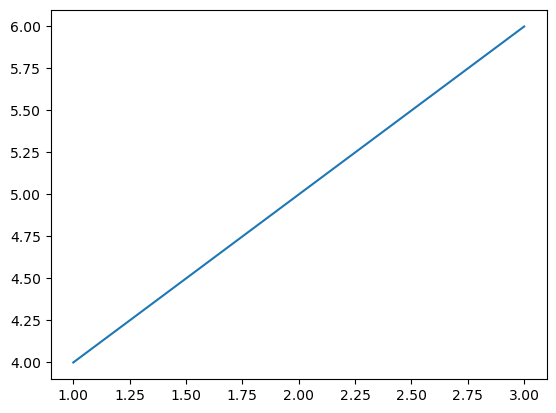

In [29]:
#line plot
x=[1,2,3]
y=[4,5,6]
plt.plot(x,y)
plt.show()

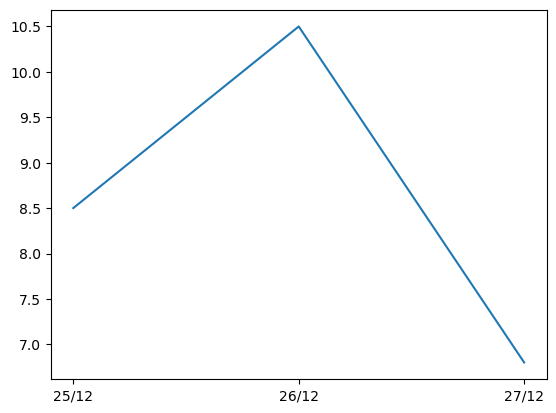

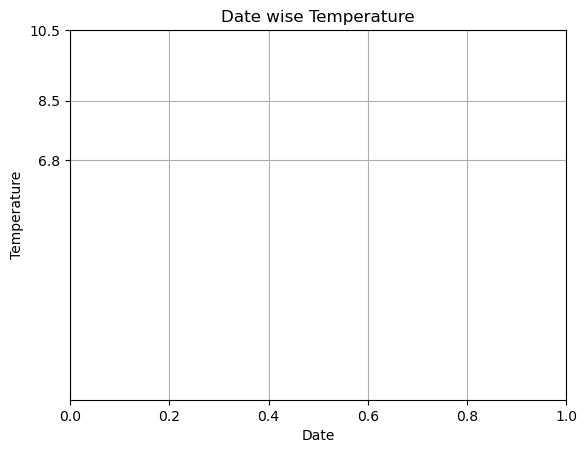

In [34]:
date=["25/12","26/12","27/12"]
temp=[8.5,10.5,6.8]
plt.plot(date,temp)
plt.show()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Date wise Temperature")
plt.grid(True)
plt.yticks(temp)
plt.show()